In [190]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [191]:
p = Path("../Dataset/images/")

dirs = p.glob("*")

labels_dict = {"cat":0,"dog":1,"horse":2,"human":3}
image_data = []
labels = []

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1][:-1]
    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(50,50))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

In [192]:
print(len(labels))

808


In [193]:
#convert this into numpy array
image_data = np.array(image_data,dtype = 'float32')/255
labels = np.array(labels)
print(image_data.shape,labels.shape)

(808, 50, 50, 3) (808,)


## Randomly shuffle of data

In [194]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)

image_data[:],labels[:] = zip(*combined)

In [195]:
def drawImg(img):
    plt.imshow(img)
    plt.show()
    return

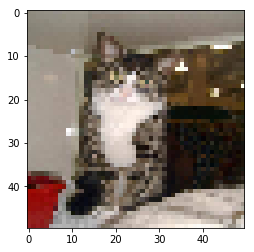

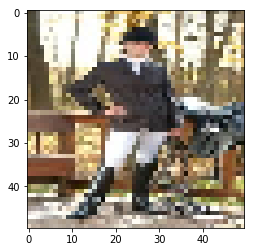

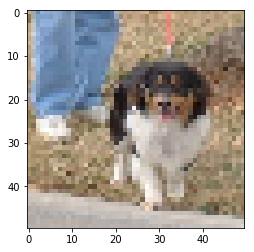

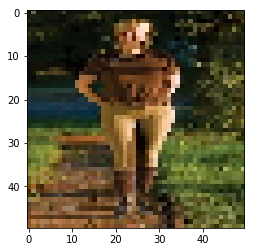

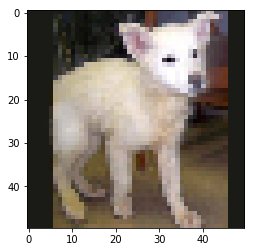

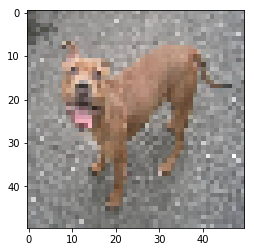

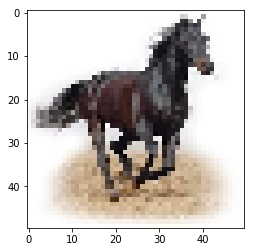

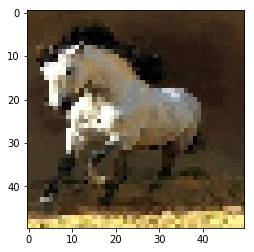

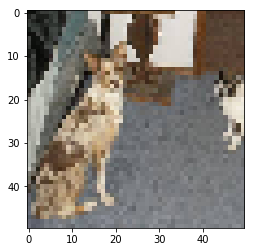

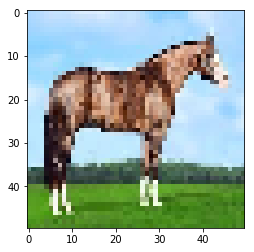

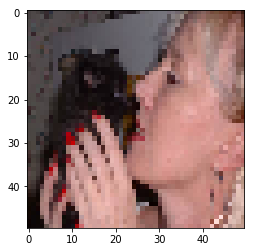

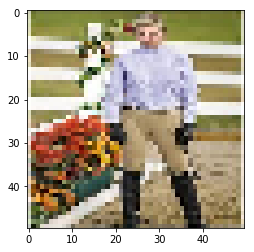

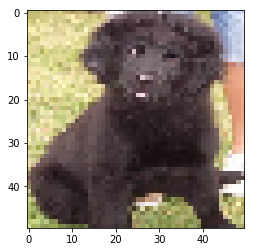

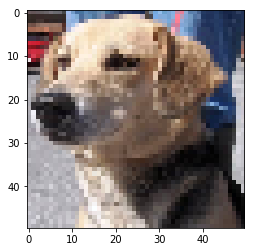

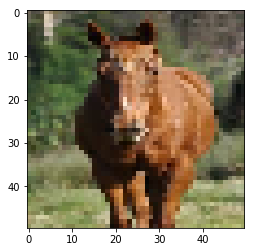

In [196]:
for i in range(15):
    drawImg(image_data[i])

In [197]:
class SVM:
    "Author : Shubham Shakya"
    def __init__(self,C=1):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeloss(self,W,b,X,Y):
        loss = 0.0
        
        loss+= 0.5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C*max(0,1-ti)
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate = 0.001,maxItr = 200):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #init the model parameter
        W = np.zeros((1,no_of_features))
        bias = 5
        
        #Inital Loss
        #print(self.hingeloss(w,bias,X,Y))
        
        #Training from here...
        #Weight and Bias update rule 
        losses = []
        for i in range(maxItr):
            #Training loop
            
            l = self.hingeloss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #batch gradient Descent with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                gradw = 0
                gradb = 0
                
                #iterate over all examples in the batch 
                for j in range(batch_start,batch_start+batch_size):
                    if(j<no_of_samples):
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if (ti>1):
                            gradb += 0
                            gradw += 0

                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]

                #gradient for the batch is ready!update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
               
        self.W = W
        self.b = bias
        return W,bias,losses
                

In [198]:
m = image_data.shape[0]
image_data = image_data.reshape(m,-1)
print(image_data.shape)
print(labels.shape)

(808, 7500)
(808,)


In [199]:
classes = len(np.unique(labels))
print(classes)

4


In [200]:
def classWiseData(x,y):
    data = {}
    for i in range(classes):
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [201]:
data = classWiseData(image_data,labels)

In [202]:
def getDataPairForSVM(d1,d2):
    "Combines data of two classes into a single matrix"
    
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1 + l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1

    return data_pair,data_labels

## Training nC2 SVM's Part

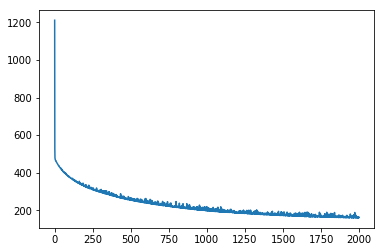

159.99323254573744


In [241]:
"checking"
mySVM = SVM()
xp,yp = getDataPairForSVM(data[0],data[1])
w,b,loss =mySVM.fit(xp,yp,learning_rate = 0.00001,maxItr = 2000)
plt.plot(loss)
plt.show()
print(loss[-2])

In [204]:
loss[-500]

171.66479510511996

In [242]:
def trainSVMs(x,y):
    svm_classifiers = {}
    for i in range(classes):
        svm_classifiers[i] = {}
        for j in range(i+1,classes):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=2000)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            print(loss[-1])
            
    return svm_classifiers
            
        

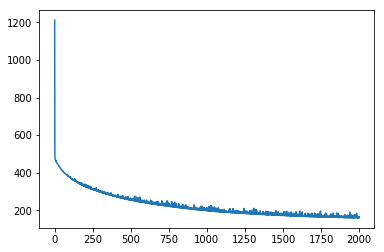

160.37248735409986


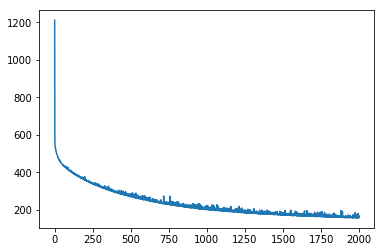

161.601601888872


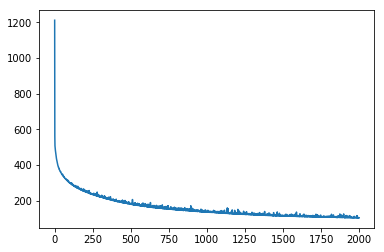

102.84299313094388


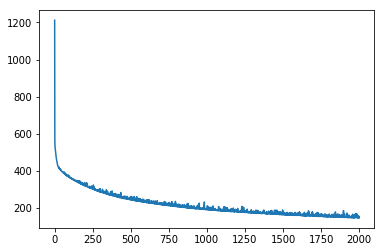

147.45152445983797


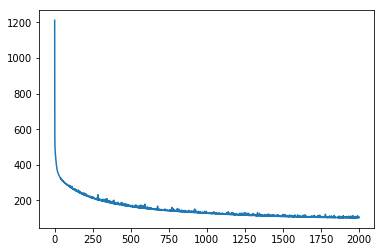

105.41773828632098


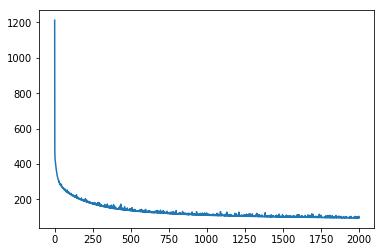

95.25562506300177


In [243]:
svm_classifiers = trainSVMs(image_data,labels)

In [244]:
def binaryPredict(x,w,b):
    z = np.dot(x,w.T) + b
    if (z>=0):
        return 1
    else:
        return -1

In [245]:
def predict(x):
    count = np.zeros((classes,))
    
    
    for i in range(classes):
        for j in range(i+1,classes):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction 
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction

In [246]:
predict(image_data[1])


3

In [247]:

def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [248]:
accuracy(image_data,labels)

0.6373762376237624

## SVM using SK-learn

In [249]:
from sklearn import svm

In [250]:
svm_sk_classifier = svm.SVC(kernel='linear',C = 1.0)

In [251]:
svm_sk_classifier.fit(image_data,labels)
svm_sk_classifier.score(image_data,labels)

0.6435643564356436

## testing a Phone capture image

In [252]:
my_img = image.load_img("dog.6.jpg",target_size=(50,50))
my_img_array = image.img_to_array(my_img)

In [253]:
my_img_array.shape

(50, 50, 3)

In [254]:
pussy = my_img_array.reshape(1,-1)

In [255]:
pussy.shape

(1, 7500)

In [256]:
predict(pussy)

0

In [257]:
def imagePredict(imgname):
    my_img = image.load_img(imgname,target_size=(50,50))
    my_img_array = image.img_to_array(my_img)
    img = my_img_array.reshape(1,-1)
    labels_dict = {0:"cat",1:"dog",2:"horse",3:"human"}
    
    return labels_dict[predict(img)]

In [258]:
imagePredict("dog.6.jpg")

'cat'

0